In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

In [48]:
df = pd.read_csv("static/data/NOAA_GSOYsummary.csv")
df

,Year,DP01,DP10,DP1X,EMXP,PRCP,CDSD,CLDD,DT00,DT32,...,FZF4,DSND,EMSD,DYFG,DYTS,WDMV,DYHF,EVAP,WDFG,WSFG
0,1880-01-01T00:00:00,93.299363,56.832272,4.738854,49.333121,656.258491,310.419000,310.419000,15.263636,116.327273,...,-10.223188,0.000000,0.000000,8.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1881-01-01T00:00:00,89.358047,53.133816,4.202532,50.030561,605.841935,350.726957,350.726957,14.917355,119.917355,...,-10.347619,1.666667,26.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1882-01-01T00:00:00,89.114022,54.016949,4.084746,50.654854,611.375573,267.283333,267.283333,12.880795,122.761589,...,-10.775439,1.500000,50.000000,NaN,7.500000,NaN,NaN,NaN,NaN,NaN
3,1883-01-01T00:00:00,87.097826,54.039402,3.461957,43.757745,580.697162,217.687879,217.687879,21.077922,134.454545,...,-11.059130,3.000000,50.000000,NaN,1.500000,NaN,NaN,NaN,NaN,NaN
4,1884-01-01T00:00:00,82.303873,49.304866,3.115194,41.584906,537.622736,236.534641,236.534641,20.651429,125.805714,...,-10.683206,0.000000,0.000000,5.25,4.666667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2006-01-01T00:00:00,NaN,NaN,NaN,56.905532,784.714335,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2007-01-01T00:00:00,NaN,NaN,NaN,62.301491,829.470245,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2008-01-01T00:00:00,NaN,NaN,NaN,64.821582,874.379384,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2009-01-01T00:00:00,NaN,NaN,NaN,61.344701,877.074088,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.count()

Year    131
DP01     70
DP10     70
DP1X     70
EMXP    131
PRCP    131
CDSD     70
CLDD     70
DT00     70
DT32     70
DX32     70
DX70     70
DX90     70
EMNT     70
EMXT     70
FZF0     70
FZF5     70
FZF6     70
HDSD     70
HTDD     70
TAVG     70
TMAX    131
TMIN    131
FZF1     70
FZF2     70
FZF7     70
FZF8     70
FZF3     70
FZF9     70
DSNW     70
EMSN     70
SNOW    131
FZF4     70
DSND     70
EMSD     70
DYFG     67
DYTS     68
WDMV     57
DYHF      9
EVAP     33
WDFG      2
WSFG      2
dtype: int64

In [50]:
dfFilt = df[["Year","EMXP","PRCP","TMAX","TMIN","SNOW"]]

In [51]:
dfFilt["Year"] = dfFilt["Year"].str[:4]
# dfFilt["Year"]

C:\Users\askbe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
dfFilt

,Year,EMXP,PRCP,TMAX,TMIN,SNOW
0,1880,49.333121,656.258491,14.119478,4.070545,2108.180556
1,1881,50.030561,605.841935,13.808136,3.991901,1751.500000
2,1882,50.654854,611.375573,13.512734,3.637748,2230.556962
3,1883,43.757745,580.697162,12.274610,2.387338,2201.511111
4,1884,41.584906,537.622736,12.993095,2.801543,2160.622047
...,...,...,...,...,...,...
126,2006,56.905532,784.714335,17.944834,5.599377,633.305111
127,2007,62.301491,829.470245,17.864903,5.552206,795.667809
128,2008,64.821582,874.379384,17.258611,4.985902,877.731620
129,2009,61.344701,877.074088,17.255281,5.069380,785.343373


In [53]:
dfFilt.to_csv("static/data/dfFilt.csv", index=False)

In [54]:
dfENT = pd.read_csv("static/data/ENT.csv")
dfENT

,Unnamed: 0,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,GCAG,GISTEMP,population
0,129,1880,236,0,3,233,0,0,-0.1148,-0.20,2785160851
1,130,1881,243,0,4,239,0,0,-0.0628,-0.12,1374791585
2,131,1882,256,0,4,252,0,0,-0.0648,-0.10,1384400649
3,132,1883,272,0,3,269,0,0,-0.1424,-0.21,1394147464
4,133,1884,275,0,4,271,0,0,-0.2009,-0.28,1403721131
...,...,...,...,...,...,...,...,...,...,...,...
126,255,2006,8370,1525,3089,3339,356,61,0.6125,0.63,19870547088
127,256,2007,8566,1572,3081,3464,382,68,0.6100,0.66,20117839192
128,257,2008,8783,1631,3122,3571,388,71,0.5419,0.54,20367267840
129,258,2009,8740,1585,3056,3620,413,66,0.6367,0.64,20618305024


In [55]:
del dfENT["Unnamed: 0"]

In [56]:
dfENT

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,GCAG,GISTEMP,population
0,1880,236,0,3,233,0,0,-0.1148,-0.20,2785160851
1,1881,243,0,4,239,0,0,-0.0628,-0.12,1374791585
2,1882,256,0,4,252,0,0,-0.0648,-0.10,1384400649
3,1883,272,0,3,269,0,0,-0.1424,-0.21,1394147464
4,1884,275,0,4,271,0,0,-0.2009,-0.28,1403721131
...,...,...,...,...,...,...,...,...,...,...
126,2006,8370,1525,3089,3339,356,61,0.6125,0.63,19870547088
127,2007,8566,1572,3081,3464,382,68,0.6100,0.66,20117839192
128,2008,8783,1631,3122,3571,388,71,0.5419,0.54,20367267840
129,2009,8740,1585,3056,3620,413,66,0.6367,0.64,20618305024


In [57]:
dfSEA = pd.read_csv("static/data/sea_level_change.csv")
dfSEA

,Time,GMSL,GMSL uncertainty
0,1880-03-15,-158.7,24.2
1,1881-03-15,-153.1,24.2
2,1882-03-15,-169.9,23.0
3,1883-03-15,-164.6,22.8
4,1884-03-15,-143.7,22.2
...,...,...,...
129,2009-03-15,58.0,6.9
130,2010-03-15,65.7,7.1
131,2011-03-15,67.3,7.5
132,2012-03-15,76.1,8.3


In [58]:
dfENT["GMSL"] = dfSEA["GMSL"]
dfENT["EMXP"] = dfFilt["EMXP"]
dfENT["PRCP"] = dfFilt["PRCP"]
dfENT["TMAX"] = dfFilt["TMAX"]
dfENT["TMIN"] = dfFilt["TMIN"]
dfENT["SNOW"] = dfFilt["SNOW"]
dfENT

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,GCAG,GISTEMP,population,GMSL,EMXP,PRCP,TMAX,TMIN,SNOW
0,1880,236,0,3,233,0,0,-0.1148,-0.20,2785160851,-158.7,49.333121,656.258491,14.119478,4.070545,2108.180556
1,1881,243,0,4,239,0,0,-0.0628,-0.12,1374791585,-153.1,50.030561,605.841935,13.808136,3.991901,1751.500000
2,1882,256,0,4,252,0,0,-0.0648,-0.10,1384400649,-169.9,50.654854,611.375573,13.512734,3.637748,2230.556962
3,1883,272,0,3,269,0,0,-0.1424,-0.21,1394147464,-164.6,43.757745,580.697162,12.274610,2.387338,2201.511111
4,1884,275,0,4,271,0,0,-0.2009,-0.28,1403721131,-143.7,41.584906,537.622736,12.993095,2.801543,2160.622047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2006,8370,1525,3089,3339,356,61,0.6125,0.63,19870547088,41.6,56.905532,784.714335,17.944834,5.599377,633.305111
127,2007,8566,1572,3081,3464,382,68,0.6100,0.66,20117839192,43.5,62.301491,829.470245,17.864903,5.552206,795.667809
128,2008,8783,1631,3122,3571,388,71,0.5419,0.54,20367267840,52.2,64.821582,874.379384,17.258611,4.985902,877.731620
129,2009,8740,1585,3056,3620,413,66,0.6367,0.64,20618305024,58.0,61.344701,877.074088,17.255281,5.069380,785.343373


In [59]:
del dfENT["Total"]
del dfENT["GCAG"]
del dfENT["GISTEMP"]
dfENT

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GMSL,EMXP,PRCP,TMAX,TMIN,SNOW
0,1880,0,3,233,0,0,2785160851,-158.7,49.333121,656.258491,14.119478,4.070545,2108.180556
1,1881,0,4,239,0,0,1374791585,-153.1,50.030561,605.841935,13.808136,3.991901,1751.500000
2,1882,0,4,252,0,0,1384400649,-169.9,50.654854,611.375573,13.512734,3.637748,2230.556962
3,1883,0,3,269,0,0,1394147464,-164.6,43.757745,580.697162,12.274610,2.387338,2201.511111
4,1884,0,4,271,0,0,1403721131,-143.7,41.584906,537.622736,12.993095,2.801543,2160.622047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2006,1525,3089,3339,356,61,19870547088,41.6,56.905532,784.714335,17.944834,5.599377,633.305111
127,2007,1572,3081,3464,382,68,20117839192,43.5,62.301491,829.470245,17.864903,5.552206,795.667809
128,2008,1631,3122,3571,388,71,20367267840,52.2,64.821582,874.379384,17.258611,4.985902,877.731620
129,2009,1585,3056,3620,413,66,20618305024,58.0,61.344701,877.074088,17.255281,5.069380,785.343373


In [127]:
# X = dfENT.drop(columns=["Year","SNOW"])
# y = dfFilt["SNOW"]

In [128]:
# X = dfENT.drop(columns=["Year","PRCP","SNOW"])
# y = dfFilt["PRCP"]

In [129]:
# X = dfENT.drop(columns=["Year","EMXP","SNOW"])
# y = dfFilt["EMXP"]

In [148]:
X = dfENT.drop(columns=["Year","TMAX","SNOW"])
y = dfFilt["TMAX"]

In [149]:
# X = dfENT.drop(columns=["Year","TMIN","SNOW"])
# y = dfFilt["TMIN"]

In [150]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [151]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [152]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [153]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8844341924331294
Testing Score: 0.9132758760518843


In [154]:
# def forecast_var(x,y):
#     forecast_y=[]
#     future_x=[]
#     x=x[-20:]
#     y=y[-20:]
#     slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
#     start_x=x[-1]
#     start_y=y[-1]
#     for j in range(2201-start_x):
#         j+=1
#         new_x=start_x+j
#         new_y=slope*(new_x)+intercept
#         forecast_y.append(new_y)
#         future_x.append(new_x)
#     return(future_x, forecast_y)
# def forecast_df(df):
#     columns=df.columns.to_list()
#     proj_df=pd.DataFrame(columns=columns)
#     for j in columns:
#         if (j=='Year'):
#             x=df.Year.to_list()
#         else:
#             y=df[f'{j}'].to_list()
#             future_x, forecast_y=forecast_var(x,y)
#             proj_df[f'{j}']=forecast_y
#             proj_df['Year']=future_x
#     return proj_df
# def forecast_change(x,y):
#     forecast_y=[]
#     future_x=[]
#     x=x[-20:]
#     y=y[-20:]
#     slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
#     start_x=x[-1]
#     start_y=y[-1]
#     for j in range(2201-start_x):
#         j+=1
#         slope=slope*1.0005
#         print(slope)
#         new_x=start_x+j
#         new_y=slope*(new_x)+intercept
#         forecast_y.append(new_y)
#         future_x.append(new_x)
#     return(future_x, forecast_y)

In [155]:
def forecast_var(x,y,change,years):
    forecast_y=[]
    future_x=[]
    x=x[years:]
    y=y[years:]
    slope, intercept, rvalue, pvalue, stderr= linregress(x,y)
    start_x=x[-1]
    start_y=y[-1]
    for j in range(2201-start_x):
        j+=1
        slope=slope*change
        new_x=start_x+j
        new_y=slope*(new_x)+intercept
        forecast_y.append(new_y)
        future_x.append(new_x)
    return(future_x, forecast_y)
def forecast_df(df,change,years):
    columns=df.columns.to_list()
    proj_df=pd.DataFrame(columns=columns)
    for j in columns:
        if (j=='Year'):
            x=df.Year.to_list()
        else:
            y=df[f'{j}'].to_list()
            future_x, forecast_y=forecast_var(x,y,change,years)
            proj_df[f'{j}']=forecast_y
            proj_df['Year']=future_x
    return proj_df


In [156]:
noChange_df = forecast_df(dfENT,1,-100)

In [157]:
noChange_df

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GMSL,EMXP,PRCP,TMAX,TMIN,SNOW
0,2011,1323.684242,3166.193333,2832.575758,252.419394,75.556364,1.954585e+10,40.569818,60.332458,870.801865,17.703259,5.779770,830.226543
1,2012,1340.378188,3203.448251,2857.630327,255.658986,76.379856,1.973418e+10,42.304844,60.252197,871.455195,17.712656,5.798045,829.026654
2,2013,1357.072133,3240.703168,2882.684896,258.898578,77.203348,1.992250e+10,44.039870,60.171937,872.108524,17.722053,5.816319,827.826765
3,2014,1373.766079,3277.958086,2907.739466,262.138170,78.026841,2.011082e+10,45.774896,60.091676,872.761854,17.731450,5.834593,826.626876
4,2015,1390.460024,3315.213003,2932.794035,265.377762,78.850333,2.029914e+10,47.509923,60.011416,873.415184,17.740848,5.852867,825.426987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2197,4428.758086,10095.607987,7492.725677,854.983498,228.725941,5.457357e+10,363.284673,45.404023,992.321207,19.451144,9.178776,607.047213
187,2198,4445.452031,10132.862904,7517.780246,858.223090,229.549433,5.476189e+10,365.019699,45.323762,992.974537,19.460541,9.197051,605.847325
188,2199,4462.145977,10170.117822,7542.834815,861.462682,230.372925,5.495021e+10,366.754725,45.243502,993.627867,19.469938,9.215325,604.647436
189,2200,4478.839922,10207.372739,7567.889385,864.702274,231.196418,5.513853e+10,368.489752,45.163241,994.281196,19.479336,9.233599,603.447547


In [158]:
incEmissions_df = forecast_df(dfENT,1.0005,-100)
incEmissions_df

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GMSL,EMXP,PRCP,TMAX,TMIN,SNOW
0,2011,1340.470005,3203.653153,2857.768127,255.676804,76.384385,1.973521e+10,42.314387,60.251756,871.458788,17.712708,5.798145,829.020055
1,2012,1373.974803,3278.423884,2908.052723,262.178674,78.037137,2.011317e+10,45.796590,60.090673,872.770023,17.731568,5.834822,826.611874
2,2013,1407.504709,3353.250647,2958.375001,268.685418,79.691127,2.049142e+10,49.281402,59.929469,874.082240,17.750442,5.871525,824.201889
3,2014,1441.059740,3428.133478,3008.734987,275.197036,81.346356,2.086994e+10,52.768825,59.768145,875.395441,17.769331,5.908257,821.790098
4,2015,1474.639912,3503.072416,3059.132705,281.713534,83.002826,2.124876e+10,56.258861,59.606700,876.709626,17.788234,5.945016,819.376500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2197,8022.512571,18115.583113,12886.296173,1552.379941,406.001549,9.511398e+10,736.788820,28.126131,1132.965425,21.474114,13.112722,348.743625
187,2198,8060.986612,18201.443418,12944.038698,1559.846133,407.899427,9.554800e+10,740.787484,27.941157,1134.471134,21.495771,13.154838,345.978277
188,2199,8099.489061,18287.367117,13001.823855,1567.317837,409.798707,9.598234e+10,744.789099,27.756046,1135.977956,21.517445,13.196986,343.210887
189,2200,8138.019934,18373.354251,13059.651674,1574.795057,411.699389,9.641700e+10,748.793669,27.570799,1137.485890,21.539134,13.239164,340.441453


In [159]:
decEmissions_df = forecast_df(dfENT,0.9995,-100)
decEmissions_df

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GMSL,EMXP,PRCP,TMAX,TMIN,SNOW
0,2011,1306.898480,3128.733514,2807.383388,249.161984,74.728342,1.935650e+10,38.825249,60.413160,870.144942,17.693810,5.761396,831.433031
1,2012,1306.798367,3128.510096,2807.233136,249.142556,74.723404,1.935537e+10,38.814844,60.413641,870.141024,17.693753,5.761286,831.440227
2,2013,1306.689965,3128.268181,2807.070444,249.121520,74.718056,1.935415e+10,38.803578,60.414162,870.136781,17.693692,5.761167,831.448018
3,2014,1306.573282,3128.007788,2806.895325,249.098877,74.712300,1.935283e+10,38.791451,60.414723,870.132215,17.693627,5.761040,831.456405
4,2015,1306.448328,3127.728934,2806.707791,249.074629,74.706137,1.935142e+10,38.778464,60.415324,870.127325,17.693556,5.760903,831.465386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2197,1154.151190,2787.856175,2578.137545,219.520166,67.193501,1.763339e+10,22.950001,61.147531,864.167064,17.607826,5.594189,842.411848
187,2198,1152.646048,2784.497236,2575.878601,219.228081,67.119254,1.761641e+10,22.793569,61.154767,864.108160,17.606979,5.592541,842.520031
188,2199,1151.134061,2781.123020,2573.609384,218.934668,67.044670,1.759935e+10,22.636426,61.162037,864.048987,17.606128,5.590886,842.628706
189,2200,1149.615235,2777.733545,2571.329903,218.639928,66.969748,1.758222e+10,22.478572,61.169339,863.989546,17.605273,5.589224,842.737873


In [160]:
def predictions(col, dropcols):
    X = decEmissions_df.drop(columns=dropcols)
    curr_dec = model.predict(X)

    X = incEmissions_df.drop(columns=dropcols)
    curr_inc = model.predict(X)

    X = noChange_df.drop(columns=dropcols)
    curr_nochan = model.predict(X)
    
    curr_pred_df=pd.DataFrame({'Year':decEmissions_df.Year,
                            'easing':curr_dec,
                            'maintaining':curr_nochan,
                            'increase':curr_inc})
    
    curr_pred_df.to_csv("static/data/"+col+"_pred_df.csv", index=False)

In [161]:
predictions("TMAX",["Year","TMAX","SNOW"])
#

In [162]:
# predictions("TMIN",["Year","TMIN","SNOW"])


In [163]:
# predictions("PRCP",["Year","PRCP","SNOW"])


In [164]:
# predictions("EMXP",["Year","EMXP","SNOW"])

In [165]:
# predictions("SNOW",["Year","SNOW"])

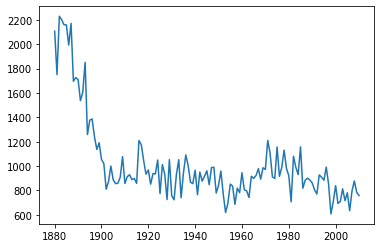

In [166]:
import matplotlib.pyplot as plt
x = dfENT["Year"]
y = dfENT["SNOW"]
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt
x = dfENT["Year"]
y = dfENT["PRCP"]
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt
x = dfENT["Year"]
y = dfENT["EMXP"]
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt
x = dfENT["Year"]
y = dfENT["TMIN"]
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt
x = dfENT["Year"]
y = dfENT["TMAX"]
plt.plot(x,y)

In [ ]:
import matplotlib.pyplot as plt
x = dfENT["Year"]
y = dfENT["GMSL"]
plt.plot(x,y)